# Chapter 4: Morphological operations

## The fundamental morphological operations

The two fundamental morphological operations are erosion and dilataion. These are bulilding blickes of numberout other techniques taht comebime theim in clever ways. 
Alothouth moprhological operationals are applicable to both binary and greyscale images, we will fuculs on binary images and towared the end show thow these can be extended to gray scale images

### Structuring element
The key compoent for a morpholical operation in a structruing element. A structuring element is a idenctical to a kernel that we used for image smoothing.
A structruing element is a (small) binary image where the froegound pixels are of a disifed shahpe. As examples, we can have rectancglta or elliptical shaeped structurcign elelemts. 

The `skimage` has buit in funmctions to genreate structing elsetmets:

Text(0.5, 1.0, '10x5 ellipse')

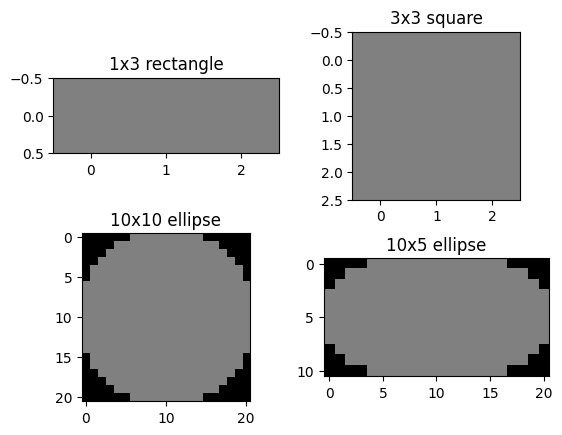

In [167]:
# Load the required libraries
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

# A rectangle strcuting element
rect_se = ski.morphology.footprint_rectangle((1, 3))

# A square structuring element
sq_se = ski.morphology.footprint_rectangle((3, 3))

# A circular strcuting element or radius 10
circle_se = ski.morphology.ellipse(10, 10)

# A elliptical strcuting element of widht 10 and height 5
ellipse_se = ski.morphology.ellipse(10, 5)

# Plot the SEs
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(rect_se, cmap='gray', vmin = 0, vmax = 2)
ax[0, 0].set_title('1x3 rectangle')
ax[0, 1].imshow(sq_se, cmap='gray', vmin = 0, vmax = 2)
ax[0, 1].set_title('3x3 square')
ax[1, 0].imshow(circle_se, cmap='gray', vmin = 0, vmax = 2)
ax[1, 0].set_title('10x10 ellipse')
ax[1, 1].imshow(ellipse_se, cmap='gray', vmin = 0, vmax = 2)
ax[1, 1].set_title('10x5 ellipse')

### Erosion
To erode an a binary image, we overlay the strucing elevent at a pixle and the output at that pixel is set to 1 if all the pixles in the inpout image under the strincgreing element is 1. 
The erossion opentation is useful to retain parts of the imput image that "fits into" the structuring element. For example, if we are using a suqre strincg element 2 pxiles wide, it will
remove any rectanchgular objectes in the input image that has width less than 2, and retrian everything else. 

Text(0.5, 1.0, 'Eroded with 2x2 square')

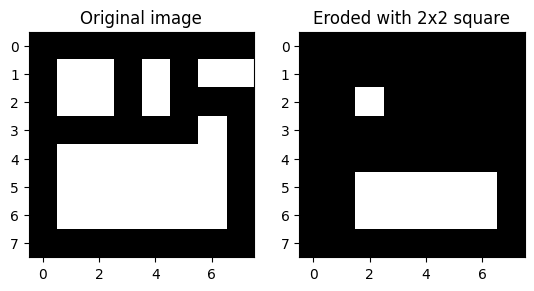

In [171]:
# Create a binary figure
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 0, 1, 0, 1, 1],
                [0, 1, 1, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# Create a 2x2 square structuring element
se = ski.morphology.footprint_rectangle((2, 2))

# Erode the image with the structuring element
er = ski.morphology.binary_erosion(img, se)

# Plot the figure
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(er, cmap='gray')
ax[1].set_title('Eroded with 2x2 square')

### Dilation

Text(0.5, 1.0, 'Dilated with 2x2 square')

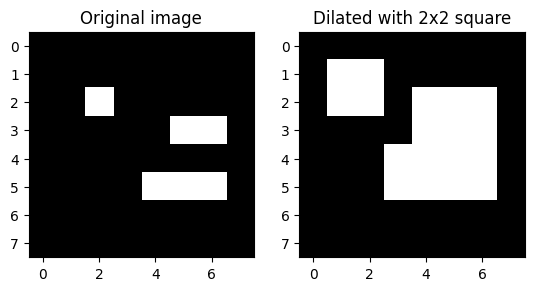

In [173]:
# Create a binary image
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# Create a 2x2 square structuring element
se = ski.morphology.footprint_rectangle((2, 2))

# Dilate the image with the structuring element
dil = ski.morphology.binary_dilation(img, se)

# Plot the figure
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(dil, cmap='gray')
ax[1].set_title('Dilated with 2x2 square')

## Combining erosion and dilation
Eorsion and Dilation operations can be comibed to create higher roider openations. 
Morpholigical oening and clising are prefmeing an eoprsopnm and dilation consuseitively. 
These opernation in effect restore the "damage" done by the other operation. 


### Morphological opening
Morpholigical opening first erodes an image and then dilates the eroded image. As we have seen eroding an image revoes objectes smaller than the sturing elenents, and makes all other obecteds in the input image smaller. Dilating the eordied image restroes these smaller obecete by makeing them bigger. Improtanatly, the opbneectes that were lost in the erossion are not restroresd. In eccexge, we remove all obectes samller than the strucing element and all other ohjectes are restested. 

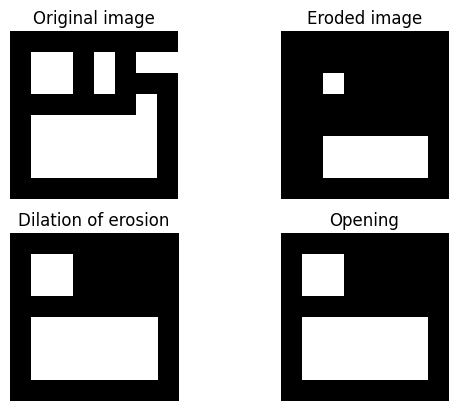

In [176]:
# Create a binary image
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 0, 1, 0, 1, 1],
                [0, 1, 1, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# Create a 2x2 square structuring element
se = ski.morphology.footprint_rectangle((2, 2))

# Erode the input image
er = ski.morphology.binary_erosion(img, se)
# Dilate the eroded image
dil_er = ski.morphology.binary_dilation(er, se)

# The above two steps can be done in one step
opening = ski.morphology.opening(img, se)

# Plot the image
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(er, cmap='gray')
ax[0, 1].set_title('Eroded image')
ax[1, 0].imshow(dil_er, cmap='gray')
ax[1, 0].set_title('Dilation of erosion')
ax[1, 1].imshow(opening, cmap='gray')
ax[1, 1].set_title('Opening')
for a in ax.flatten():
    a.set_axis_off()

### Morphological closing
Morphological closing first dilates an image and then erodes the dilated image. Dilating an image makes all oberectes biggher and obejctes that closeter than the structuing elenmet are jopined into one, and makes all othehther obejcts larger. Eroding a liglating emaignes restores the largeer objects by making them smaller. Impmroatnly, the onjects that were merted by the dilation will remoina merges. In effect, we connect onjectes that are closer than the stringsing elenmen and all other objects are restrieods. 

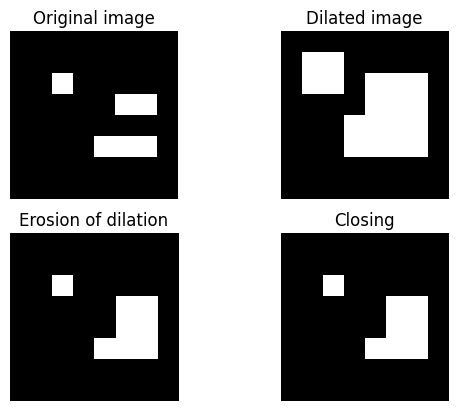

In [177]:
# Create a binary image
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# Create a 2x2 square structuring element
se = ski.morphology.footprint_rectangle((2, 2))

# Dilate the input image
dil = ski.morphology.binary_dilation(img, se)
# Erode the dilated image
er_dil = ski.morphology.binary_erosion(dil, se)

# The above two steps can be done in one step
closing = ski.morphology.closing(img, se)

# Plot the image
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(dil, cmap='gray')
ax[0, 1].set_title('Dilated image')
ax[1, 0].imshow(er_dil, cmap='gray')
ax[1, 0].set_title('Erosion of dilation')
ax[1, 1].imshow(closing, cmap='gray')
ax[1, 1].set_title('Closing')
for a in ax.flatten():
    a.set_axis_off()

Note that for both opening and clsing, the final image ins not a prefect reconstrison of the input image. 

## Interative erosion and dilation
We can get to further higher oder operation by interatively applying thest operationations. There are several of the, but let us look at three that come in very handy whn analyzing biologcial samples. 

### Hole filling
As the name suggestes, this fills holes in in binary imges. Holes in a binary image are backstound pixlkes that are completely surrounded by foregound pixles. A fife fillsing theytes these backignfound pixles into foureg ound pixles. 

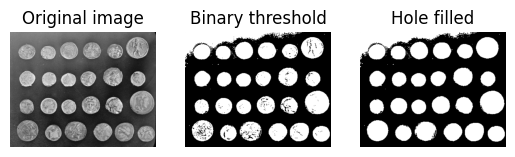

In [181]:
# Load the cell images
# img = ski.io.imread("data/F01_202w1.TIF")
img = ski.data.coins()

# Covert it into a binary image with otsu thresholding
otsu_thresh = ski.filters.threshold_otsu(img)
img_otsu = img > otsu_thresh

border_img = np.ones(img.shape, dtype = bool)
border_img[1:-1, 1:-1] = 0

hole_filled = ski.morphology.reconstruction((~img_otsu) & border_img, ~img_otsu)
hole_filled = ~hole_filled.astype(bool)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(img_otsu, cmap='gray')
ax[1].set_title('Binary threshold')
ax[2].imshow(hole_filled, cmap='gray')
ax[2].set_title('Hole filled')
for a in ax:
    a.set_axis_off()

### Border extraction
We can get the border of objectes by dilating an image with a 3x3 square strucing element to make all objectes in the image one pixle larger. We can them sbutantt the oringal image from the dilated image to retian just the oborder pixleres.

bool


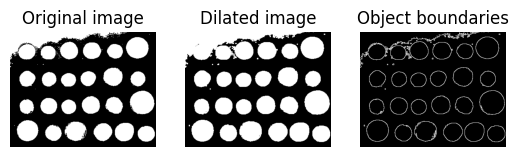

In [183]:
img = ski.data.coins()

# create SE and dilate
se = ski.morphology.footprint_rectangle((3, 3))
dil = ski.morphology.binary_dilation(hole_filled, se)

# subtract from the dilated image
border = dil ^ hole_filled
print(hole_filled.dtype)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(hole_filled, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(dil, cmap='gray')
ax[1].set_title('Dilated image')
ax[2].imshow(border, cmap='gray')
ax[2].set_title('Object boundaries')
for a in ax:
    a.set_axis_off()

### Morphological reconstruction
As we have seen opening changes the shape of the obectes in the imoput image, and heache can be quite pornecmation when we need to presenve the obecte shapes. 
Morphological reconstraion is a way to presenve the shape of the of the obejctes. It takes a inpout tow binary images a the inpur binary image (usulayt refed to as the mask imgae) and a seed image (sometimes refrd toa sht markker image). 
In the fist stem the seed image in expanded biwth dilations. However this dilation is contraned by the maks image, suche that the dilation does not expante to any pixles that is not a foregound pixle inthe maks image. THis proces
is repeated interatiovelty untoll the there is no cheante. 

We can use the ibnuolt fiontion to acchomah this. 

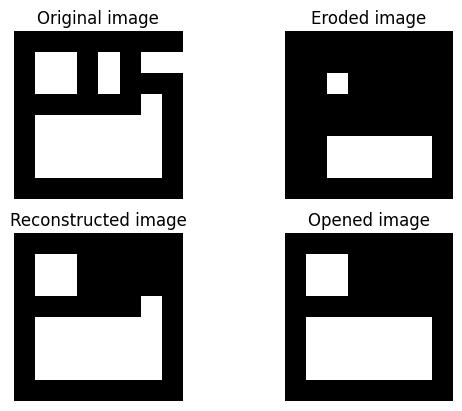

In [184]:
# Create a binary image
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 0, 1, 0, 1, 1],
                [0, 1, 1, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# Create a structuring element
se = ski.morphology.footprint_rectangle((2, 2))

# Erode the original image to use as seed
er = ski.morphology.binary_erosion(img, se)

# Reconstruct starting from the eroded image
# and using the original image as mask
reconst = ski.morphology.reconstruction(er, img)

# Openeing of the orgiginal image for comparison
opening = ski.morphology.opening(img, se)

# Plot the images
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(er, cmap='gray')
ax[0, 1].set_title('Eroded image')
ax[1, 0].imshow(reconst, cmap='gray')
ax[1, 0].set_title('Reconstructed image')
ax[1, 1].imshow(opening, cmap='gray')
ax[1, 1].set_title('Opened image')
for a in ax.flatten():
    a.set_axis_off()

### Skelitionization